## Data Preprocessing

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("weather_AUS.csv")              # Load and reading dataset

In [4]:
df.shape

(145460, 23)

In [5]:
df.head()                                     # printing First 5 values of each column to check columns value

,Date,Location,MinTemp,Temprature,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'Temprature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df = df.drop(['Date', 'Location'], axis = 1)

In [8]:
cat = df.select_dtypes(include = 'object')

In [9]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
for col in cat:
    df[col] = lE.fit_transform(df[col])

In [10]:
df.head()

,MinTemp,Temprature,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [11]:
df.isna().sum()

MinTemp           1485
Temprature        1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [12]:
df = df.dropna(subset = ['Temprature'])

In [13]:
df.isna().sum()

MinTemp            620
Temprature           0
Rainfall          2470
Evaporation      62174
Sunshine         69188
WindGustDir          0
WindGustSpeed     9564
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1392
WindSpeed3pm      2582
Humidity9am       1772
Humidity3pm       3503
Pressure9am      14051
Pressure3pm      14012
Cloud9am         54909
Cloud3pm         58251
Temp9am            893
Temp3pm           2610
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
df[['MinTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']] = df[['MinTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']].interpolate()

In [15]:
df.isna().sum()                                                    # checking the null values in dataset

MinTemp             0
Temprature          0
Rainfall            0
Evaporation      6009
Sunshine         6009
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [16]:
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

In [17]:
df.isnull().sum()                                                           # again checking null values either removed or not

MinTemp          0
Temprature       0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
df.shape

(144199, 21)

In [19]:
X = df.drop(['Temprature'], axis = 1)
Y = df['Temprature']

In [20]:
from sklearn.preprocessing import StandardScaler
sS = StandardScaler()
X_scaled = sS.fit_transform(X)

In [21]:
df = X_scaled
df = pd.DataFrame(X_scaled, columns = X.columns)
df = pd.concat([df, Y.reset_index(drop = True)], axis = 1)

In [22]:
corr = df.corr()

<Axes: >

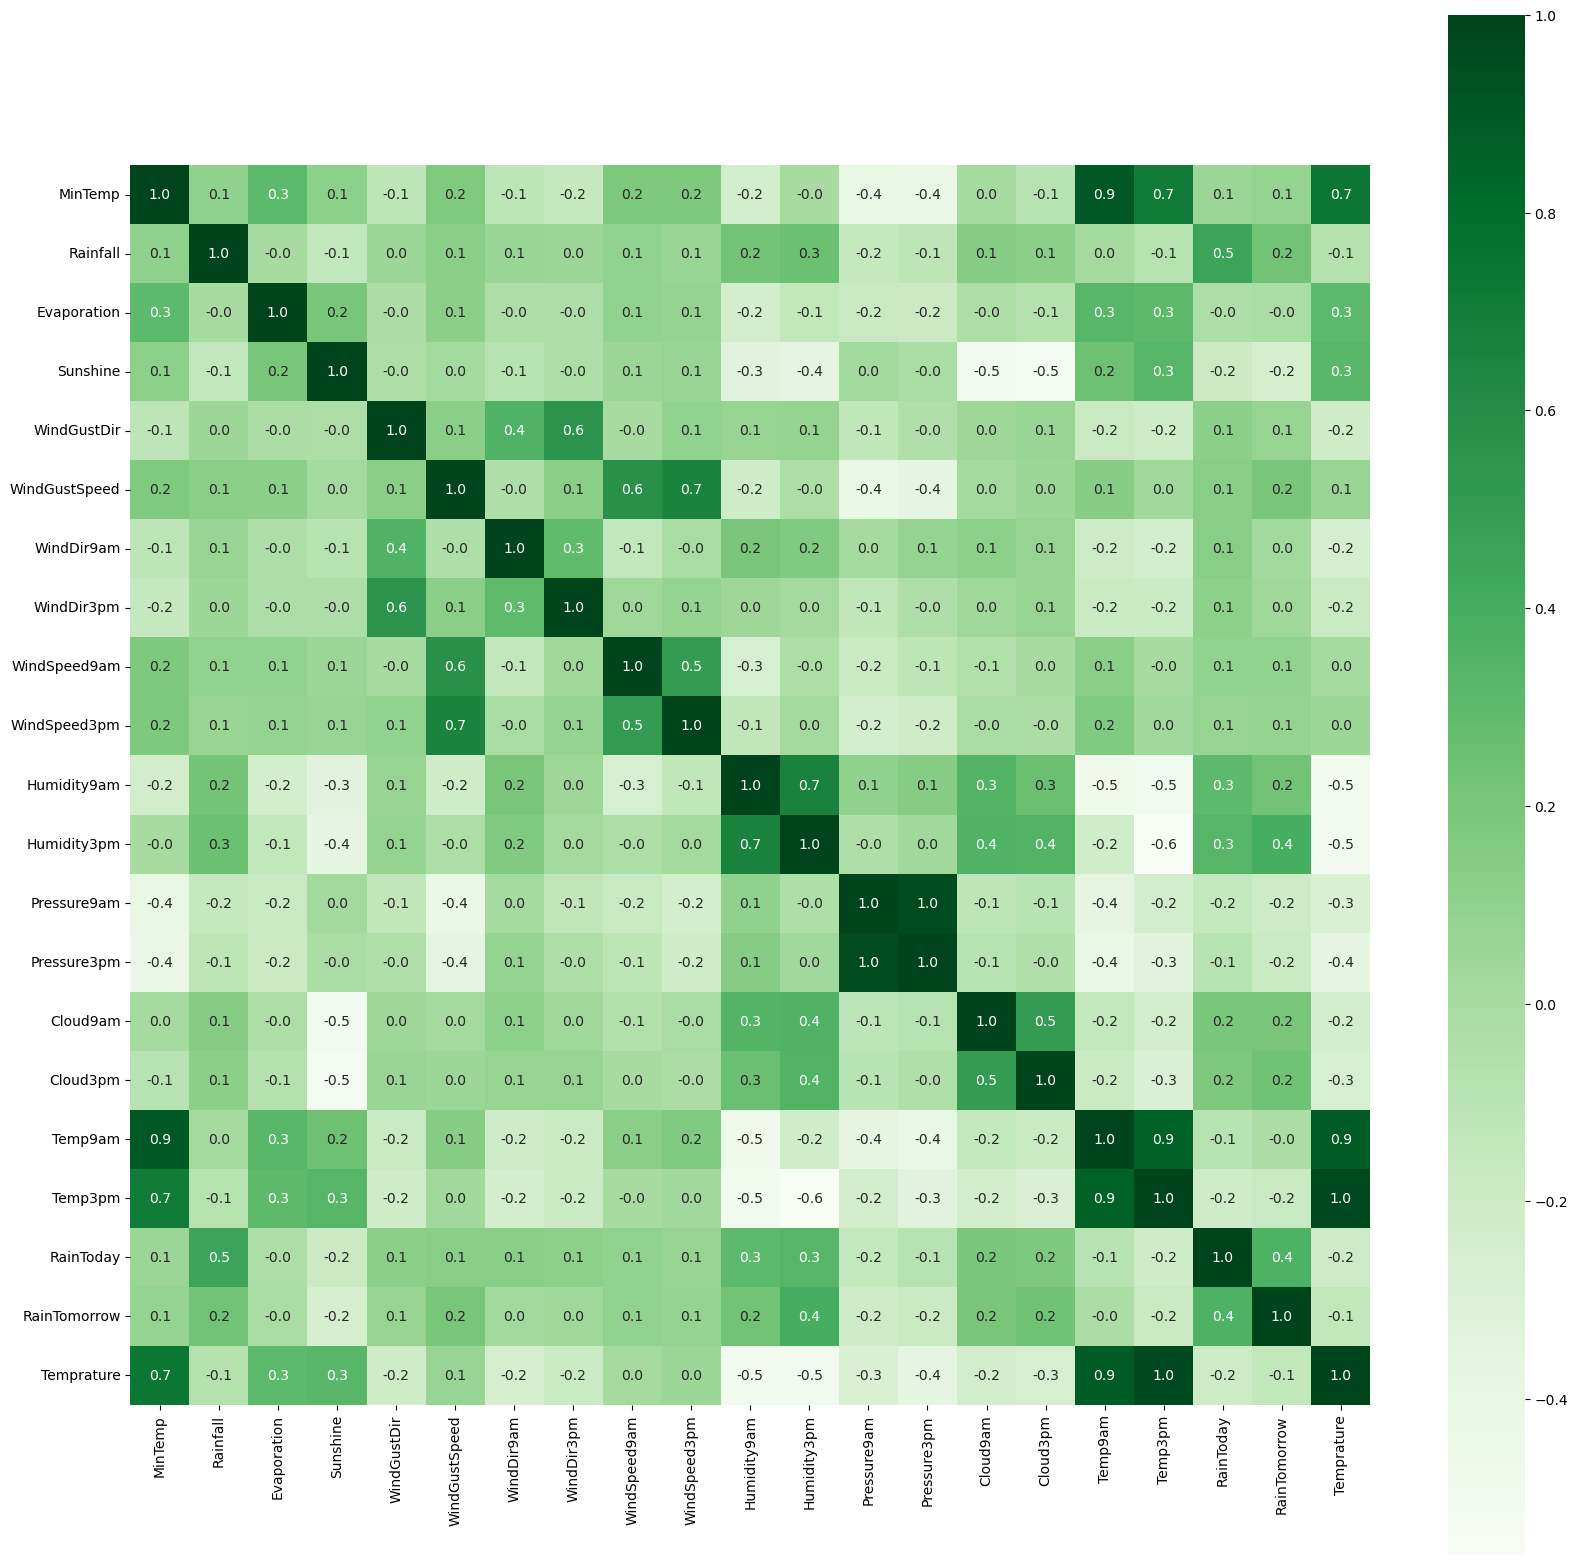

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))                                                             # drawing heatmap
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',                                   
annot=True, annot_kws={'size':10}, cmap='Greens')                            

In [24]:
df.columns                                      # printing columns name to remove according to correlation in heatmap

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Temprature'],
      dtype='object')

In [25]:
df = df.drop(['Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis = 1)        # removing columns using correlation and heatmap

<Axes: >

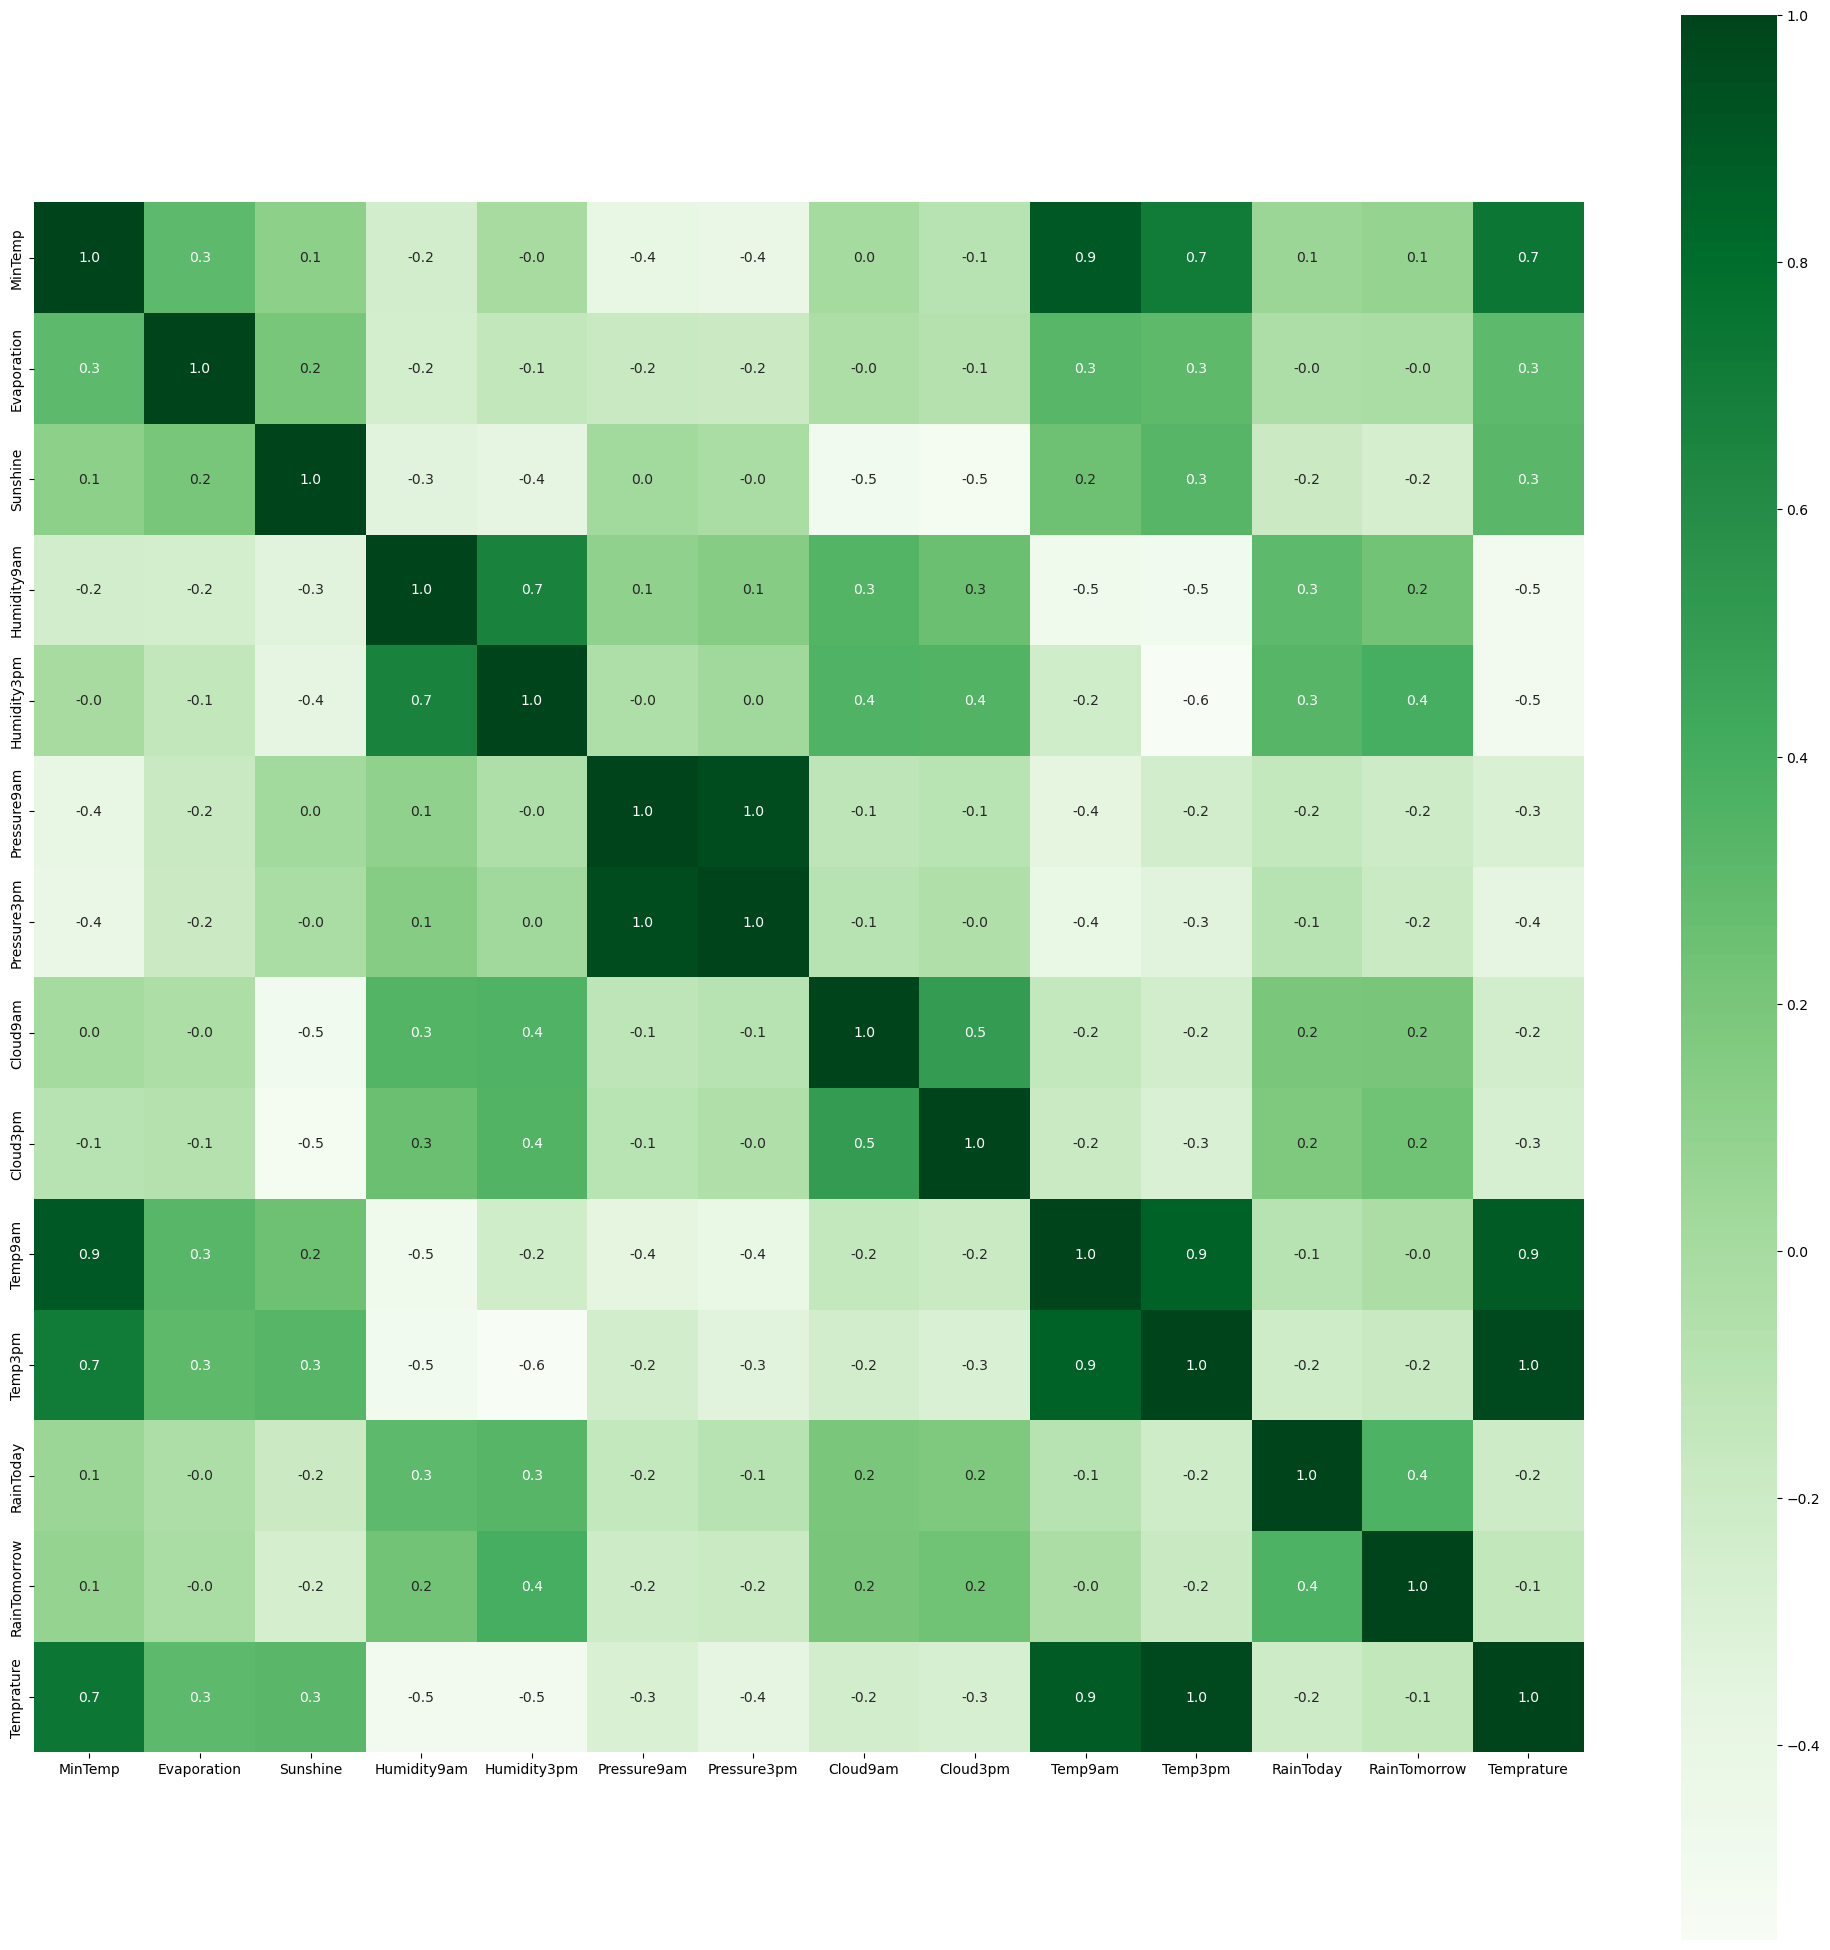

In [26]:
correlation = df.corr()                                                                   # again finding correlation
correlation
plt.figure(figsize = (25, 25))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
annot=True, annot_kws={'size':10}, cmap='Greens')                                           # again drawing heatmap

In [27]:
df = df.drop(['RainTomorrow', 'Humidity3pm','Evaporation', 'Sunshine', 'MinTemp'], axis = 1)

<Axes: >

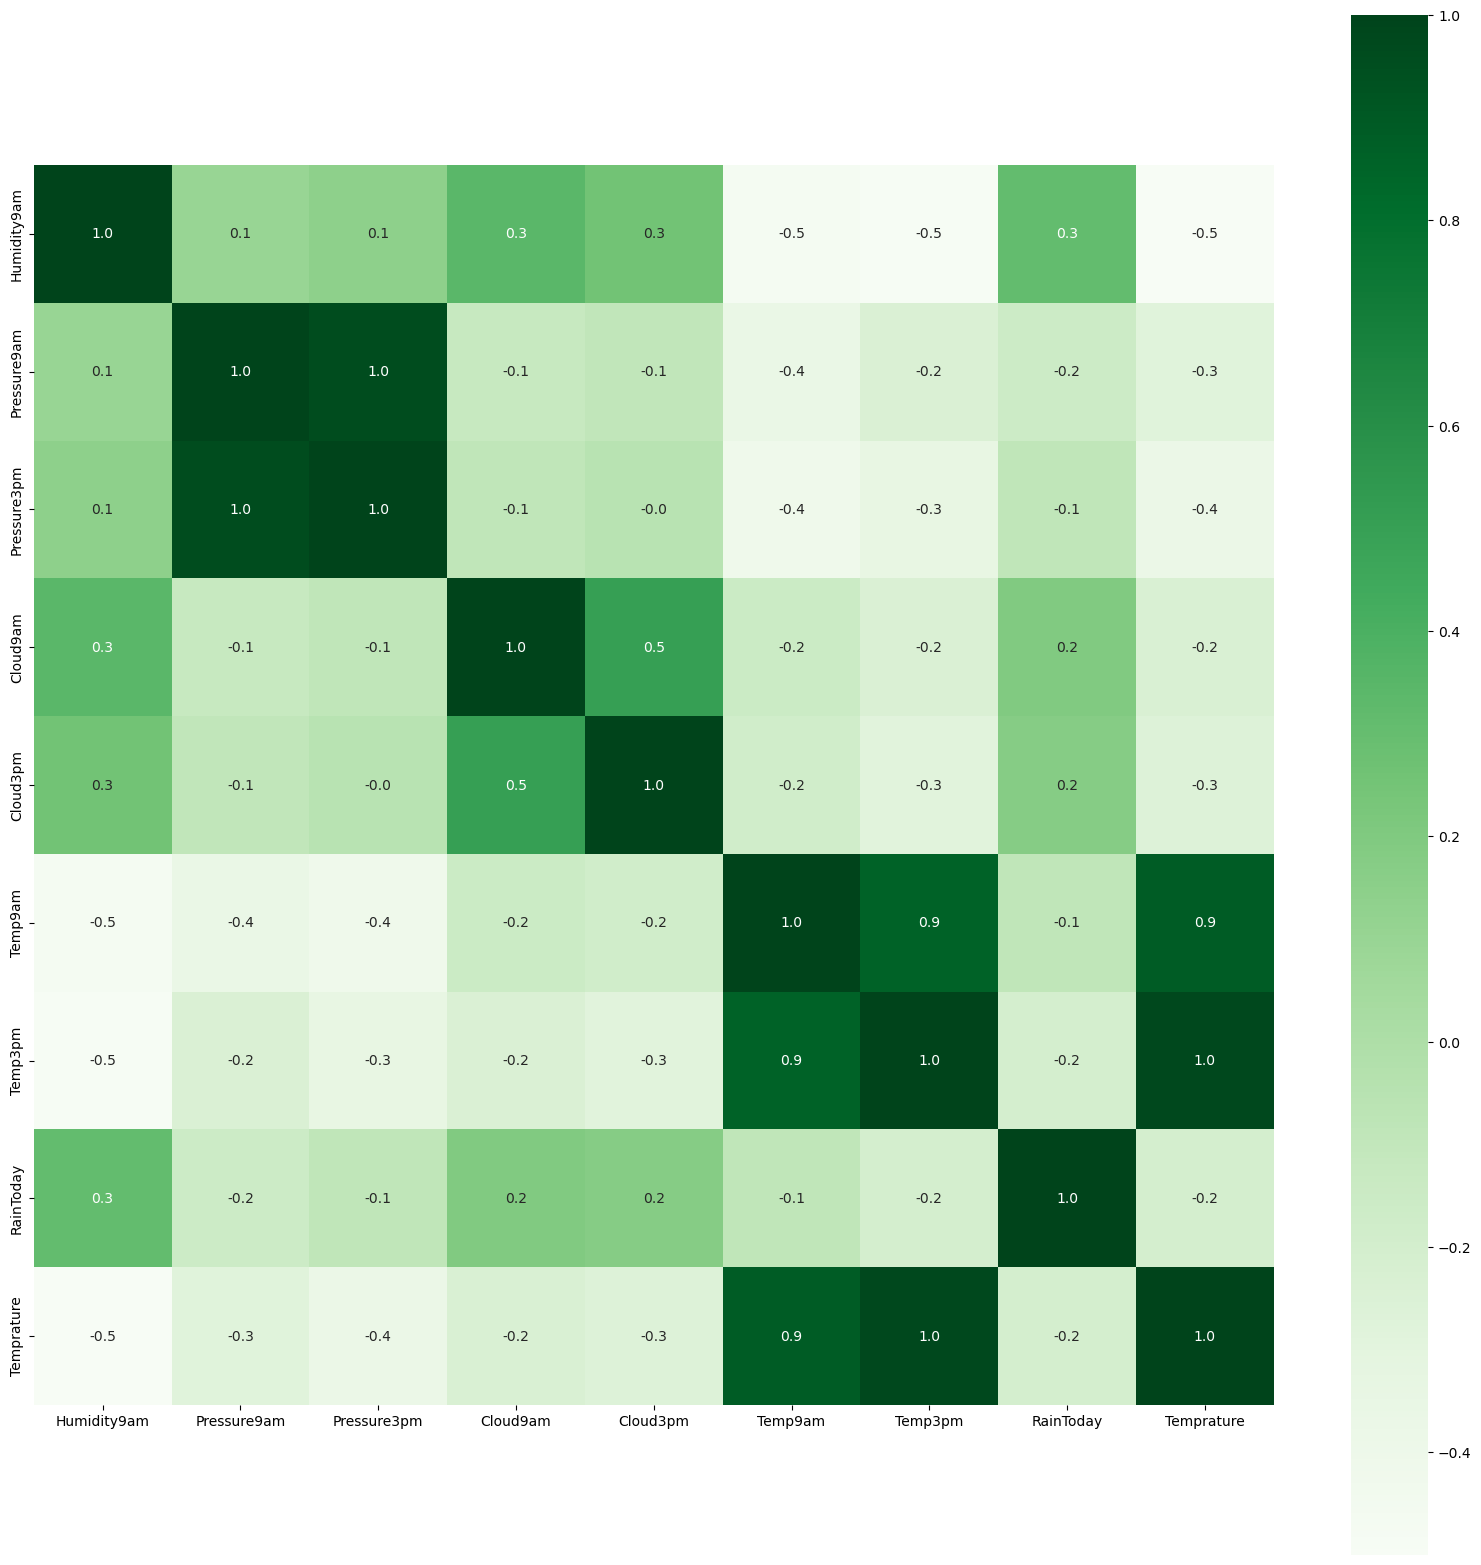

In [28]:
corr = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',                                   
annot=True, annot_kws={'size':10}, cmap='Greens')

In [29]:
df.shape

(144199, 9)

In [30]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 20)

In [31]:
# X = pca.fit_transform(X_scaled)

## Data Spliting

In [32]:
from sklearn.model_selection import train_test_split                                                   # importing spliting model
X = df.drop(['Temprature'], axis=1)                                                                     # Assigning dataset except target column to predict
Y = df['Temprature']                                                                                    # Assigning target columns to predict values
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.2, random_state = 20)           # (here 24% is our test size and randomState)spliting and printing values of X,Y test and train
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  115359
Size of Train Y =  115359
Size of Test X =  28840
Size of Test Y =  28840


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
Afaq = LinearRegression()                                              # importing and creating object of Linear Regression

In [34]:
Afaq.fit(X_TRAIN, Y_TRAIN)     

LinearRegression()

### Evaluation of LinearRegression

#### Prediction on training data

In [35]:
training_data_prediction = Afaq.predict(X_TRAIN)                              # predicting data from Training data

[45.09367433 25.51515021 11.97880517 ... 21.12119404 18.03935074
 33.02790567]
R squared :  0.9696114302891095
Mean Absolute Error :  0.8235882268941909


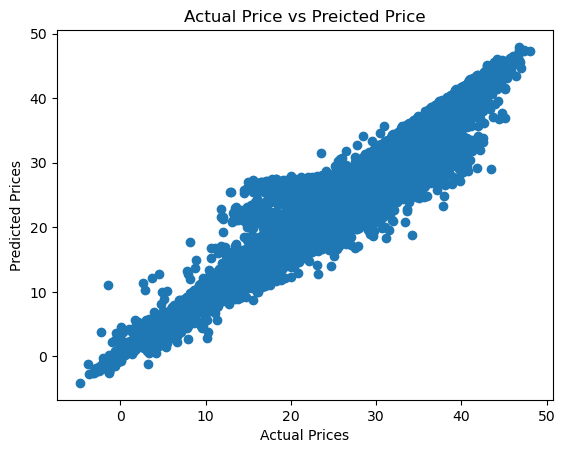

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics
print(training_data_prediction)
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_TRAIN, training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)                                 # drawing graph between Actual training-data v/s predicted training-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#### Prediction on Testing Data

[ 2.95374187 16.51973504 29.16712574 ... 32.40682967 27.62611589
 12.36472436]
R squared :  0.9688211979950146
Mean Absolute Error :  0.8297107440945815


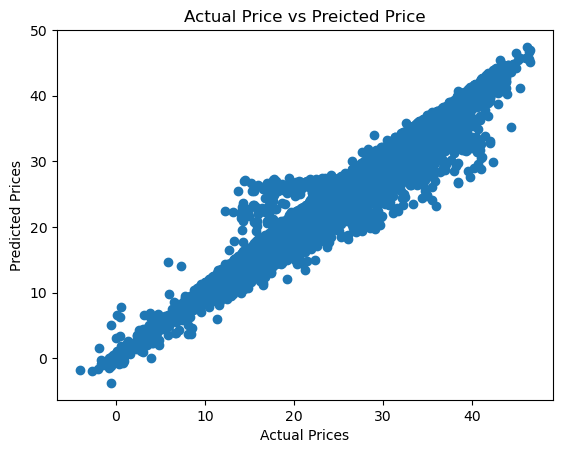

In [37]:
y_pred = Afaq.predict(X_TEST)                              # predicting data from Testing data
print(y_pred)
score_1 = metrics.r2_score(Y_TEST, y_pred)
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)                                 # drawing graph between Actual testing-data v/s predicted testing-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

## SVM

In [37]:
from sklearn.svm import SVR                                             # importing and creating object of Linear Regression
Afaq = SVR(kernel='linear')

In [ ]:
Afaq.fit(X_TRAIN, Y_TRAIN)                                              # fitting model on training data

## Evaluation of SVM

#### Prediction on training data

[45.09367433 25.51515021 11.97880517 ... 21.12119404 18.03935074
 33.02790567]
R squared :  0.9696114302891095
Mean Absolute Error :  0.8235882268941909


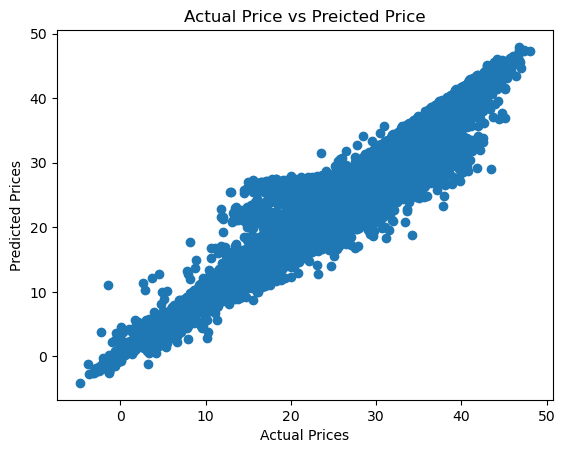

In [38]:
training_data_prediction = Afaq.predict(X_TRAIN)                              # predicting data from training data
print(training_data_prediction)
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)                                # drawing graph between Actual training-data v/s predicted training-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#### Prediction on Testing Data

[ 2.95374187 16.51973504 29.16712574 ... 32.40682967 27.62611589
 12.36472436]
R squared :  0.9688211979950146
Mean Absolute Error :  0.8297107440945815


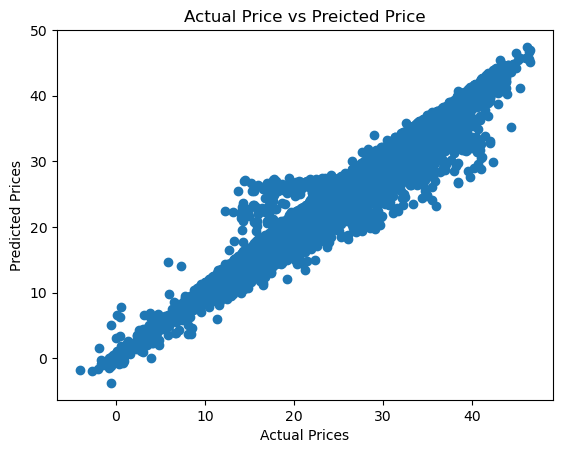

In [39]:
y_pred = Afaq.predict(X_TEST)                              # predicting data from Testing data
print(y_pred)
score_1 = metrics.r2_score(Y_TEST, y_pred)
score_2 = metrics.mean_absolute_error(Y_TEST, 
y_pred)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)                                # drawing graph between Actual testing-data v/s predicted testing-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

## Decesion Regression Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
Afaq = DecisionTreeRegressor(random_state = 20)                                  # create a regressor object

In [39]:
Afaq.fit(X_TRAIN, Y_TRAIN)                                                       # fitting model on X and Y data

DecisionTreeRegressor(random_state=20)

### Evaluation of DecesionTree

#### Prediction on training data

[46.  25.6 12.1 ... 20.3 18.4 32.3]
R squared :  1.0
Mean Absolute Error :  1.4397607857551073e-17


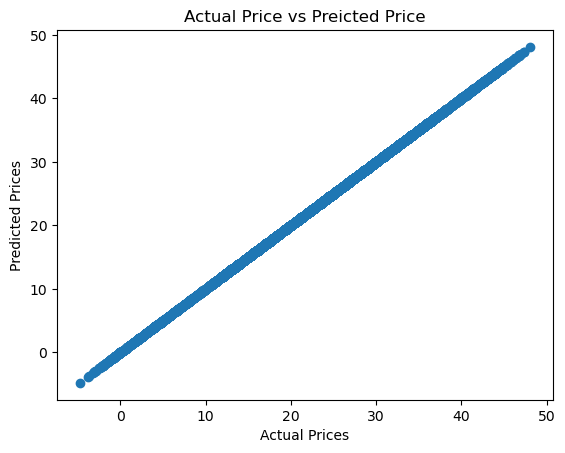

In [40]:
training_data_prediction = Afaq.predict(X_TRAIN)                              # predicting data from Training data
print(training_data_prediction)
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)                                # drawing graph between Actual Training-data v/s predicted Training-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#### Prediction on Testing Data

[ 5.9 17.9 31.  ... 32.6 29.1 12.8]
R squared :  0.9603508969532085
Mean Absolute Error :  0.9767024965325936


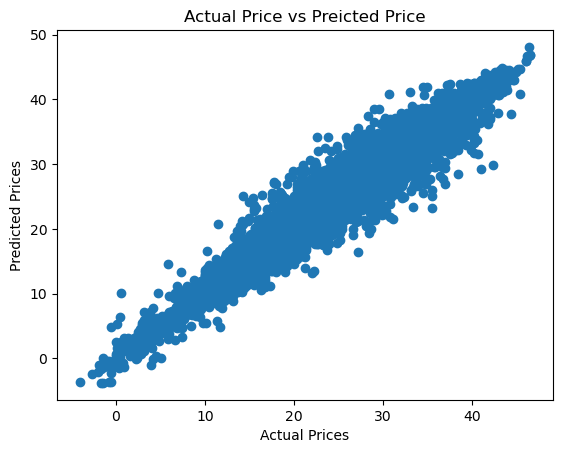

In [41]:
y_pred = Afaq.predict(X_TEST)                              # predicting data from Testing data
print(y_pred)
score_1 = metrics.r2_score(Y_TEST, y_pred)
score_2 = metrics.mean_absolute_error(Y_TEST, 
y_pred)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)                                # drawing graph between Actual testing-data v/s predicted testing-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor                       # importing RandomForestRegressor Model
Afaq = RandomForestRegressor(n_estimators=5, random_state=20)            # creating object

In [43]:
Afaq.fit(X_TRAIN, Y_TRAIN)                                               # fit the regressor with X and Y data

RandomForestRegressor(n_estimators=5, random_state=20)

### Evaluation of Random Forest

#### Prediction on training data

[45.88 25.46 12.1  ... 19.98 18.26 31.94]
R squared :  0.9946826701893295
Mean Absolute Error :  0.3149391031475654


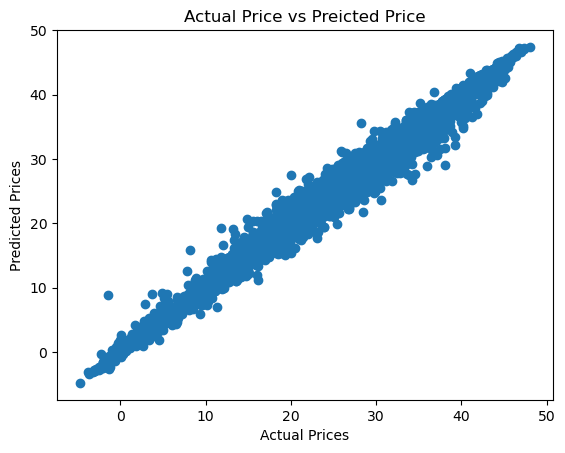

In [44]:
training_data_prediction = Afaq.predict(X_TRAIN)                              # predicting data from Training data
print(training_data_prediction)
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_TRAIN, 
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)                                # drawing graph between Actual Training-data v/s predicted Training-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#### Prediction on Testing Data

[ 5.02 17.68 29.18 ... 32.5  27.36 12.5 ]
R squared :  0.9761249292709739
Mean Absolute Error :  0.7655485436893203


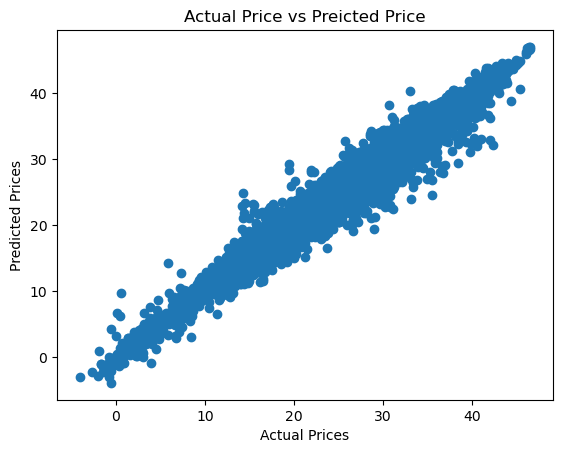

In [45]:
y_pred = Afaq.predict(X_TEST)                              # predicting data from Testing data
print(y_pred)
score_1 = metrics.r2_score(Y_TEST, y_pred)
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)                                # drawing graph between Actual testing-data v/s predicted testing-data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
from sklearn.tree import plot_tree
tree_to_plot = Afaq.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), 
filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()